In [31]:
# Columns and responding variables

In [32]:
#cp: Chest pain
#tresbps: resting blood pressure
#chol: serum cholestrol
#fbs: fasting blood pressure
#restecg: resting electocardiographic results
#thalach: maximum heart rate achieved
#extang: exercise induced agina
#ca: number of major vessels colored by flourscopy

In [33]:
import pandas as pd

In [34]:
import seaborn as sns

In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('heart.csv')

In [38]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [39]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [40]:
data.shape

(1025, 14)

In [41]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 1025
Number of Columns 14


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [43]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
dup_data = data.duplicated().sum()

In [45]:
dup_data

723

In [46]:
data = data.drop_duplicates()

In [47]:
dup_data

723

In [48]:
data = data.drop_duplicates()

In [49]:
data.shape

(302, 14)

In [50]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
# Classify numerical and categorical data

In [52]:
categorical_values = []
numerical_values = []

In [53]:
for column in data.columns:
    if data[column].nunique() <10:
        categorical_values.append(column)
    else:
        numerical_values.append(column)

In [54]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [55]:
numerical_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [56]:
#Distribution Analysis of numerical data

In [57]:
#age

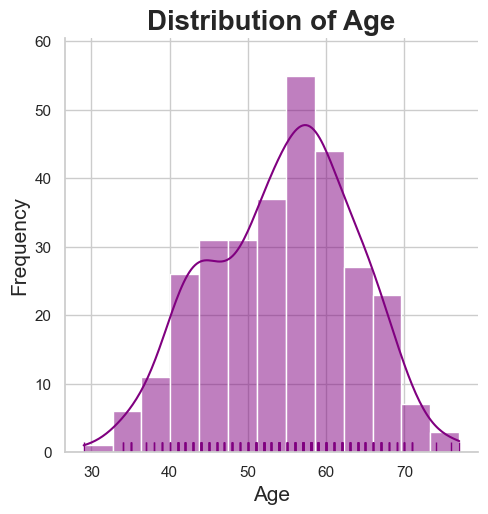

In [58]:
sns.set(style="whitegrid")
sns.displot(data['age'], kde=True, rug=True, color='purple')
plt.title('Distribution of Age',fontsize=20, fontweight='semibold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [59]:
#2 Distribution of resting blood pressure

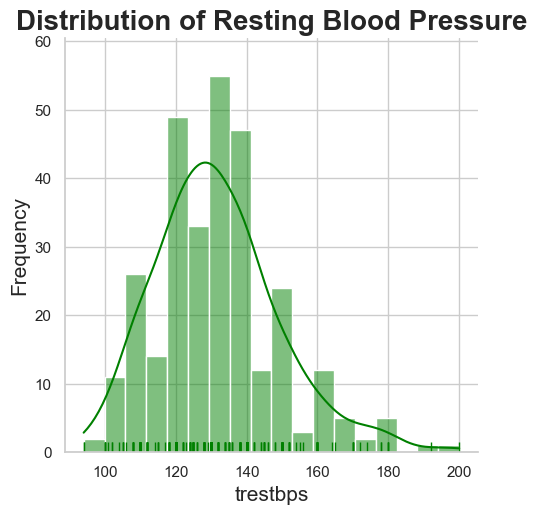

In [60]:
sns.set(style="whitegrid")
sns.displot(data['trestbps'], kde=True, rug=True, color='green')
plt.title('Distribution of Resting Blood Pressure', fontsize=20, fontweight='semibold')
plt.xlabel('trestbps', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [61]:
#3 Distributrion of serum cholesterol

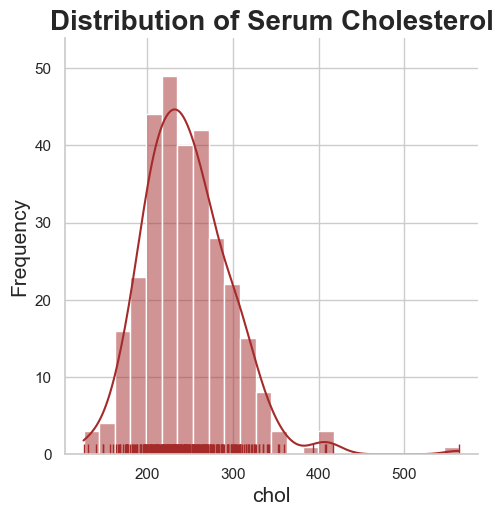

In [62]:
sns.set(style="whitegrid")
sns.displot(data['chol'], kde=True, rug=True, color='brown')
plt.title('Distribution of Serum Cholesterol', fontsize=20, fontweight='semibold')
plt.xlabel('chol', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [63]:
#4 Distribution of maximum heart rate achieved

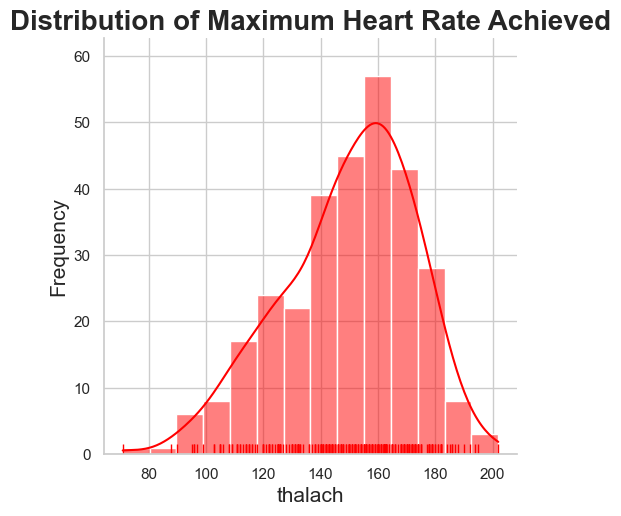

In [64]:
sns.set(style='whitegrid')
sns.displot(data['thalach'], kde=True, rug=True, color='red')
plt.title("Distribution of Maximum Heart Rate Achieved", fontsize=20, fontweight='semibold')
plt.xlabel("thalach", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

In [65]:
#5 Distribution of oldpeak

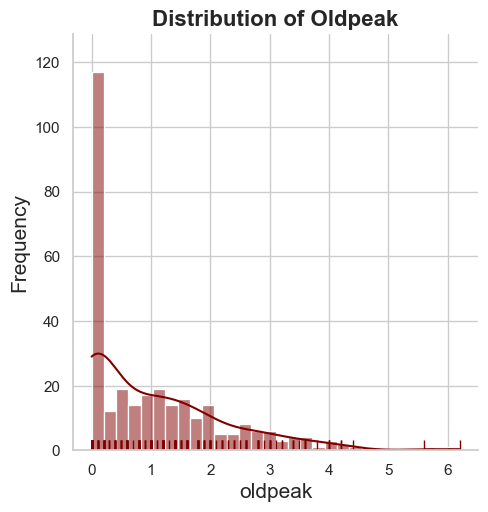

In [66]:
sns.set(style='whitegrid')
sns.displot(data['oldpeak'], kde=True, rug=True, color='maroon', bins=30)
plt.title("Distribution of Oldpeak", fontsize=16, fontweight='semibold')
plt.xlabel("oldpeak", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

In [67]:
# Distribution analysis for categorical data

In [68]:
for column in categorical_values:
    value_counts = data[column].value_counts()
    print(f"Values and Counts for {column}:\n{value_counts}\n{'-'*50}\n")

Values and Counts for sex:
sex
1    206
0     96
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for cp:
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for fbs:
fbs
0    257
1     45
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for restecg:
restecg
1    151
0    147
2      4
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for exang:
exang
0    203
1     99
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for slope:
slope
2    141
1    140
0     21
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for ca:
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for thal:
thal
2  

In [69]:
# Renaming of Categorical values
#sex column:  1:'M'(Male),0:'F'(Female),
#Target column(Heart disease): 1:'Y'(Yes),0:'N(No)',
#Fasting blood sugar(fbs): 1:'Y'(Yes),0:'N(No)'
#Exercise induced agina(extang): 1:'Y'(Yes),0:'N'(No)

In [70]:
data['sex'] = data['sex'].replace({1:'M',0:'F'})

In [71]:
data['target'] = data['target'].replace({1:'Y',0:'N'})

In [72]:
data['fbs'] = data['fbs'].replace({1:'Y',0:'N'})

In [73]:
data['exang'] = data['exang'].replace({1:'Y',0:'N'})

In [74]:
converted_data = ['sex', 'target', 'fbs', 'exang']
for column in converted_data:
    valuecount = data[column].value_counts()
    print(f"The Value and Count of {column}\n{valuecount}\n{'-'*50}")

The Value and Count of sex
sex
M    206
F     96
Name: count, dtype: int64
--------------------------------------------------
The Value and Count of target
target
Y    164
N    138
Name: count, dtype: int64
--------------------------------------------------
The Value and Count of fbs
fbs
N    257
Y     45
Name: count, dtype: int64
--------------------------------------------------
The Value and Count of exang
exang
N    203
Y     99
Name: count, dtype: int64
--------------------------------------------------


In [75]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [76]:
#6 Distribution of sex

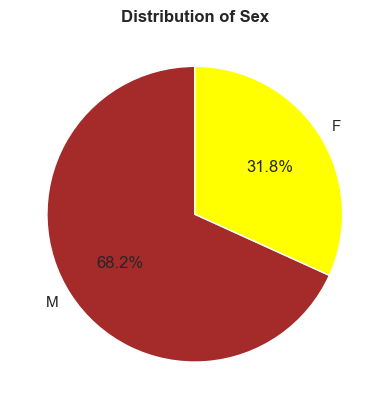

In [77]:
colors = ['brown','yellow']
plt.pie(data['sex'].value_counts(), labels=data['sex'].unique(), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Sex', fontweight='semibold')
plt.show()

In [78]:
#7 Distribution of target

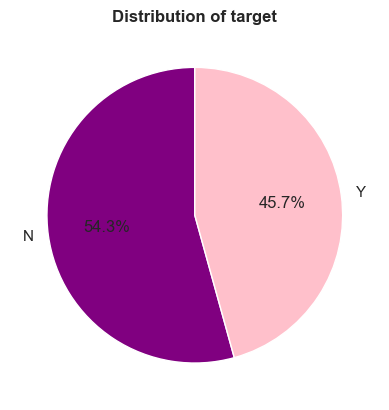

In [79]:
colors = ['purple','pink']
plt.pie(data['target'].value_counts(), labels=data['target'].unique(), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Distribution of target", fontweight='semibold')
plt.show()

In [80]:
#8 Distribution of Fasting Blood Sugar

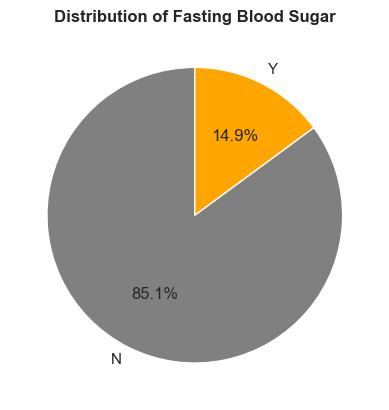

In [81]:
colors=['grey','orange']
plt.pie(data['fbs'].value_counts(), labels=data['fbs'].unique(), colors=colors, startangle=90, autopct="%1.1f%%")
plt.title("Distribution of Fasting Blood Sugar", fontweight='semibold')
plt.show()

In [82]:
#9 Distribution of Exercise Induced Angina

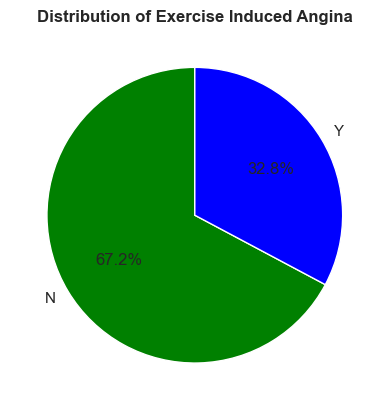

In [83]:
colors = ['green','blue']
plt.pie(data['exang'].value_counts(), labels=data['exang'].unique(), autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Distribution of Exercise Induced Angina", fontweight='semibold')
plt.show()

In [84]:
#10 Distribution of Chest Pain

<ipython-input-85-6d6d60c99113>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=data, palette=colors)
<ipython-input-85-6d6d60c99113>:2: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='cp', data=data, palette=colors)


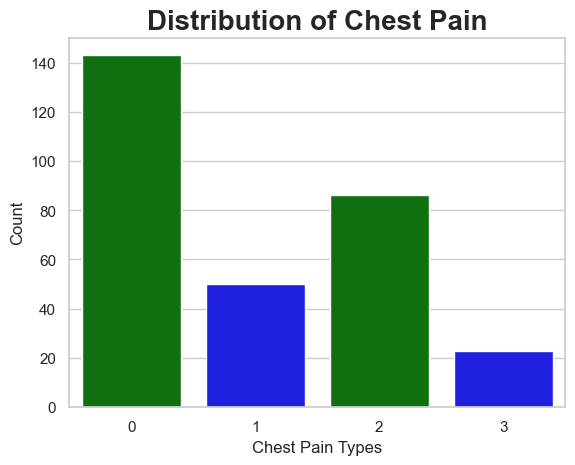

In [85]:
sns.set(style="whitegrid")
sns.countplot(x='cp', data=data, palette=colors)
plt.title("Distribution of Chest Pain", fontsize=20, fontweight='semibold')
plt.xlabel("Chest Pain Types")
plt.ylabel("Count")
plt.show()

In [86]:
#11 Distribution of Resting Electrocardiographic

<ipython-input-87-f2e407e1993b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='restecg', data=data, palette=colors)


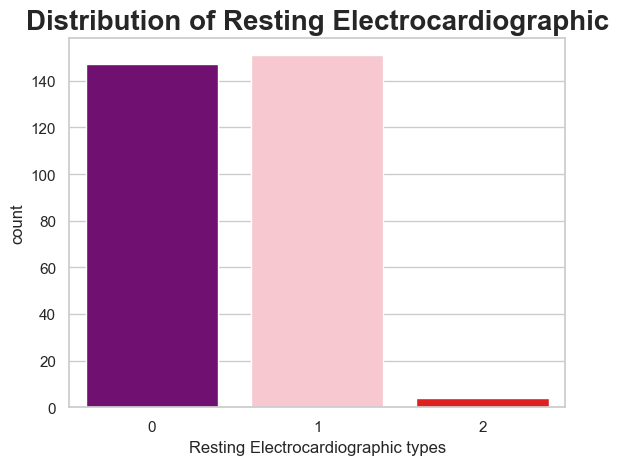

In [87]:
sns.set(style="whitegrid")
colors = ['purple', 'pink', 'red']
sns.countplot(x='restecg', data=data, palette=colors)
plt.title("Distribution of Resting Electrocardiographic", fontsize=20, fontweight='semibold')
plt.xlabel("Resting Electrocardiographic types")
plt.show()

In [88]:
#12 Distribution of Slope

<ipython-input-89-5e343238b276>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='slope', data=data,palette=colors)


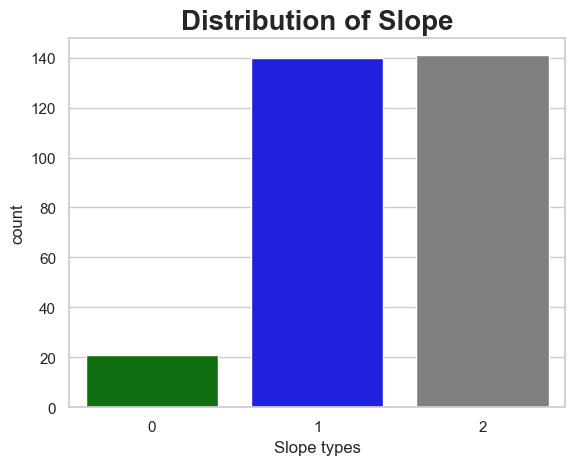

In [89]:
sns.set(style='whitegrid')
colors = ['green','blue','grey']
sns.countplot(x='slope', data=data,palette=colors)
plt.title("Distribution of Slope", fontsize=20, fontweight='semibold')
plt.xlabel("Slope types")
plt.show()

In [90]:
#12 Distribution of Number of Major Vessels

<ipython-input-91-eb4819971131>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ca', data=data,palette=colors)
<ipython-input-91-eb4819971131>:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='ca', data=data,palette=colors)


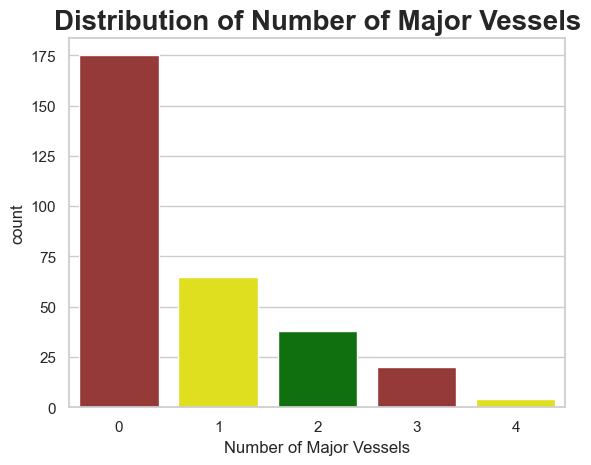

In [91]:
sns.set(style='whitegrid')
colors = ['brown','yellow','green']
sns.countplot(x='ca', data=data,palette=colors)
plt.title("Distribution of Number of Major Vessels", fontsize=20, fontweight='semibold')
plt.xlabel("Number of Major Vessels")
plt.show()

In [92]:
#13 Distribution of Thal

<ipython-input-93-7c955de68576>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='thal', data=data,palette=colors)
<ipython-input-93-7c955de68576>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='thal', data=data,palette=colors)


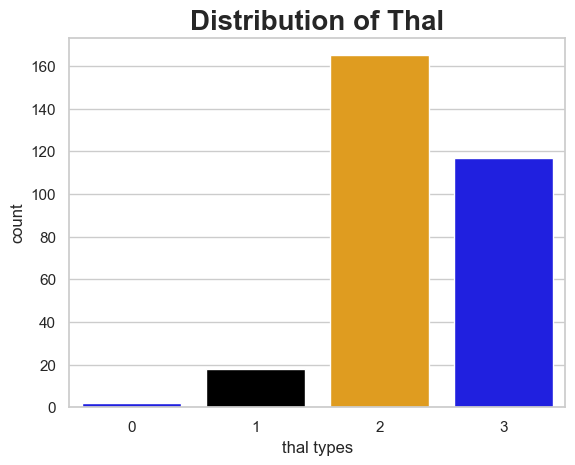

In [93]:
sns.set(style='whitegrid')
colors = ['blue','black','orange']
sns.countplot(x='thal', data=data,palette=colors)
plt.title("Distribution of Thal", fontsize=20, fontweight='semibold')
plt.xlabel("thal types")
plt.show()

In [94]:
# Distribution of Numerical varibales across different categories

In [95]:
numerical_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [96]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [97]:
# Age vs. Categorical Values

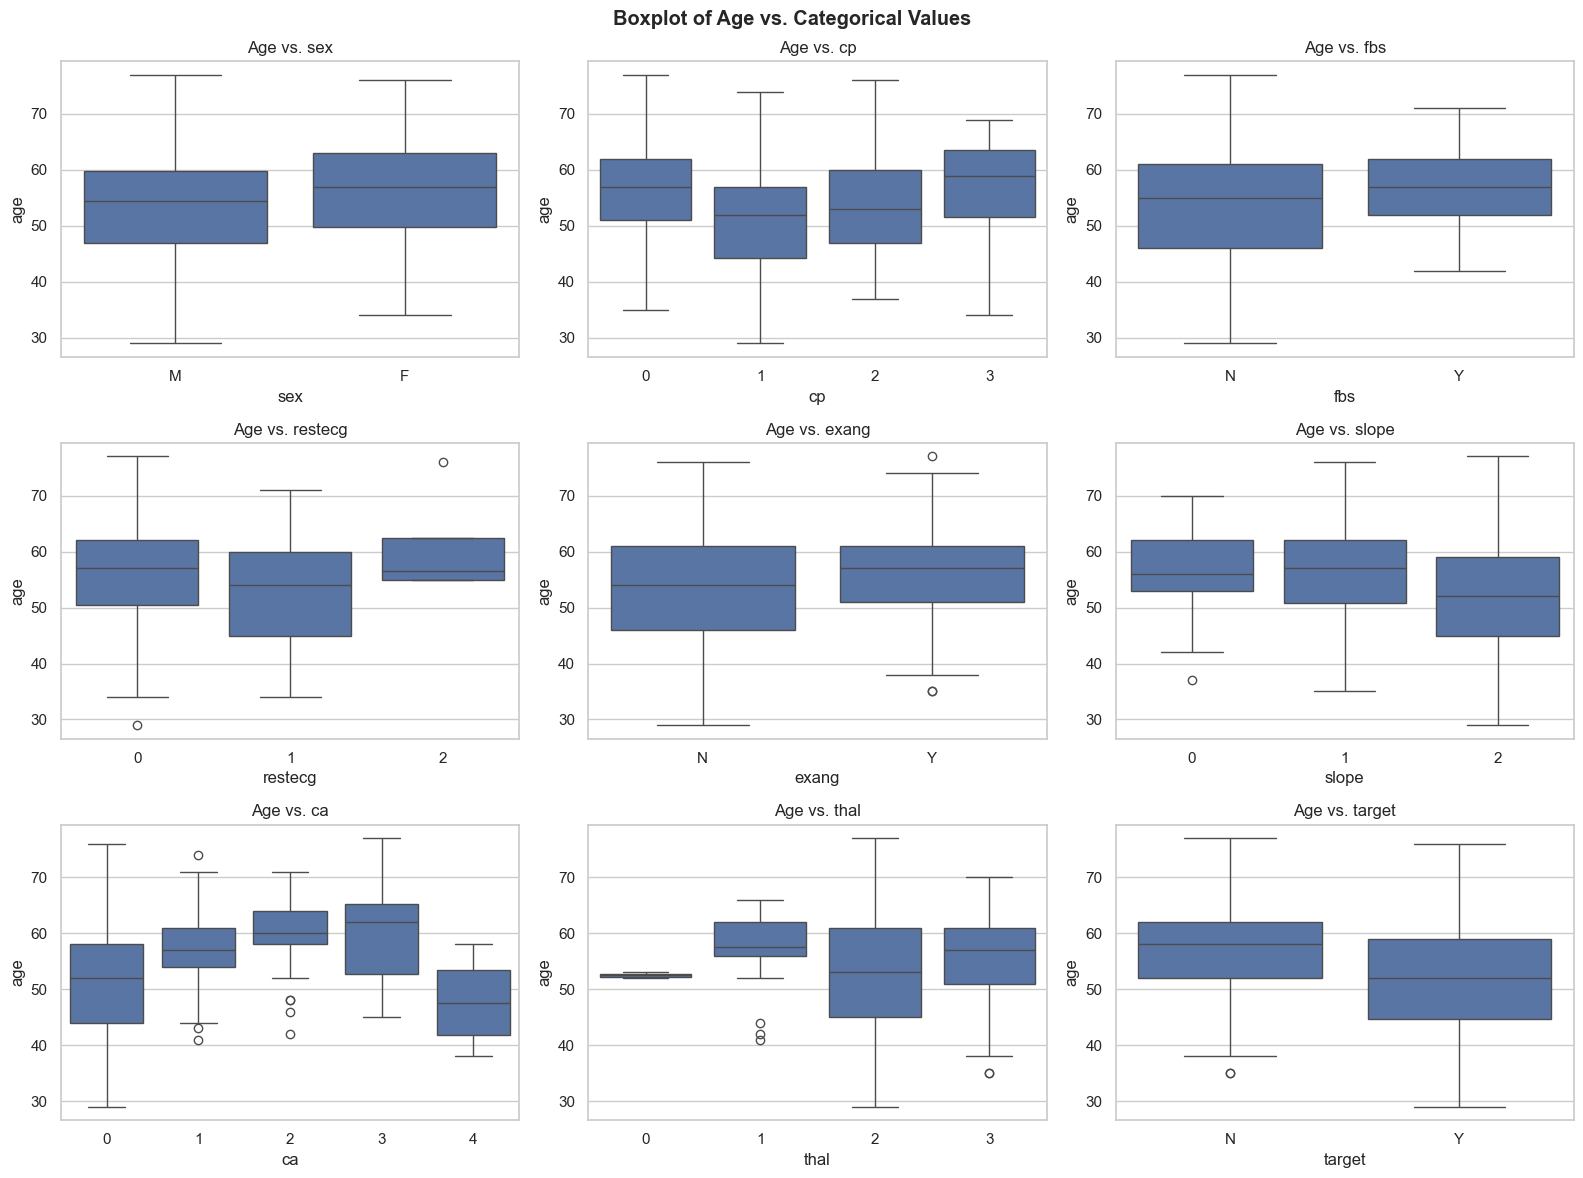

In [101]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.boxplot(x=cat_value, y='age', data=data, ax=axes[i])
    axes[i].set_title(f'Age vs. {cat_value}')

plt.suptitle("Boxplot of Age vs. Categorical Values", fontweight='semibold')
plt.tight_layout()
plt.show()

In [102]:
# trestbps vs. Categorical Values

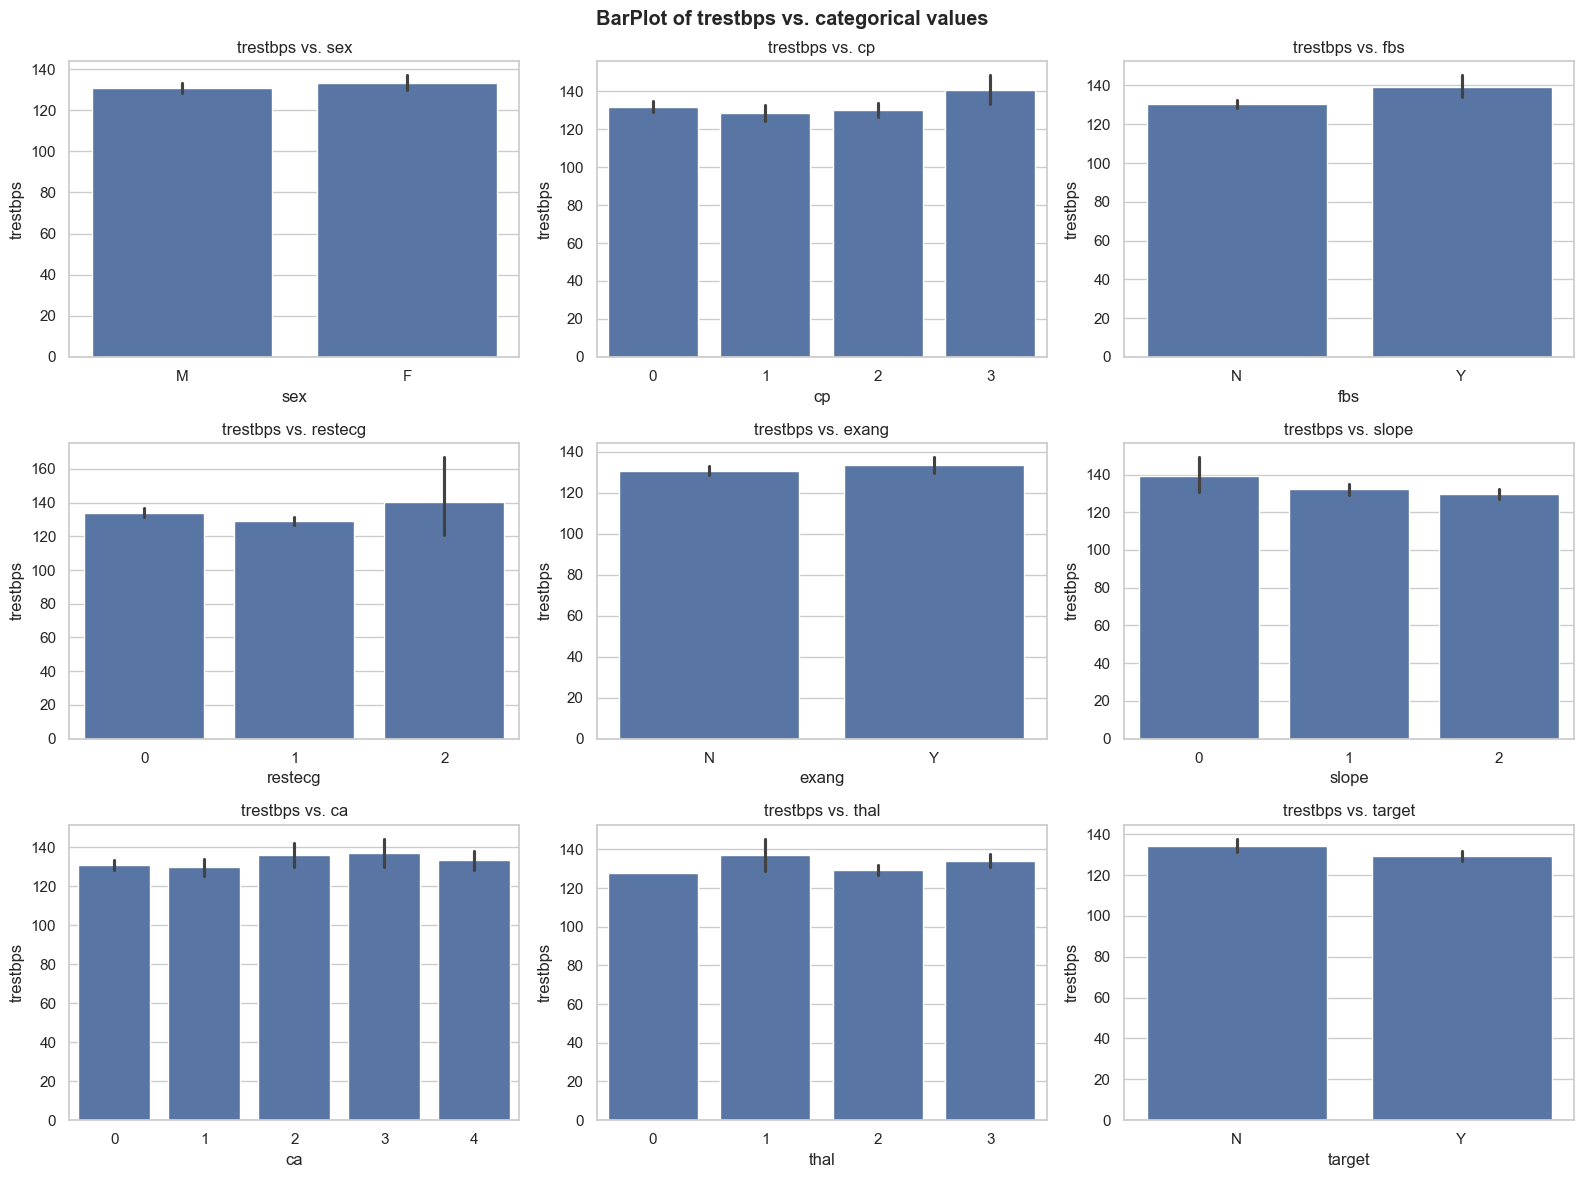

In [106]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,12))

axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.barplot(x=cat_value, y='trestbps', data=data, ax=axes[i])
    axes[i].set_title(f"trestbps vs. {cat_value}")

plt.suptitle("BarPlot of trestbps vs. categorical values", fontweight='semibold')
plt.tight_layout()
plt.show()

In [107]:
# chol vs. Categorical Value

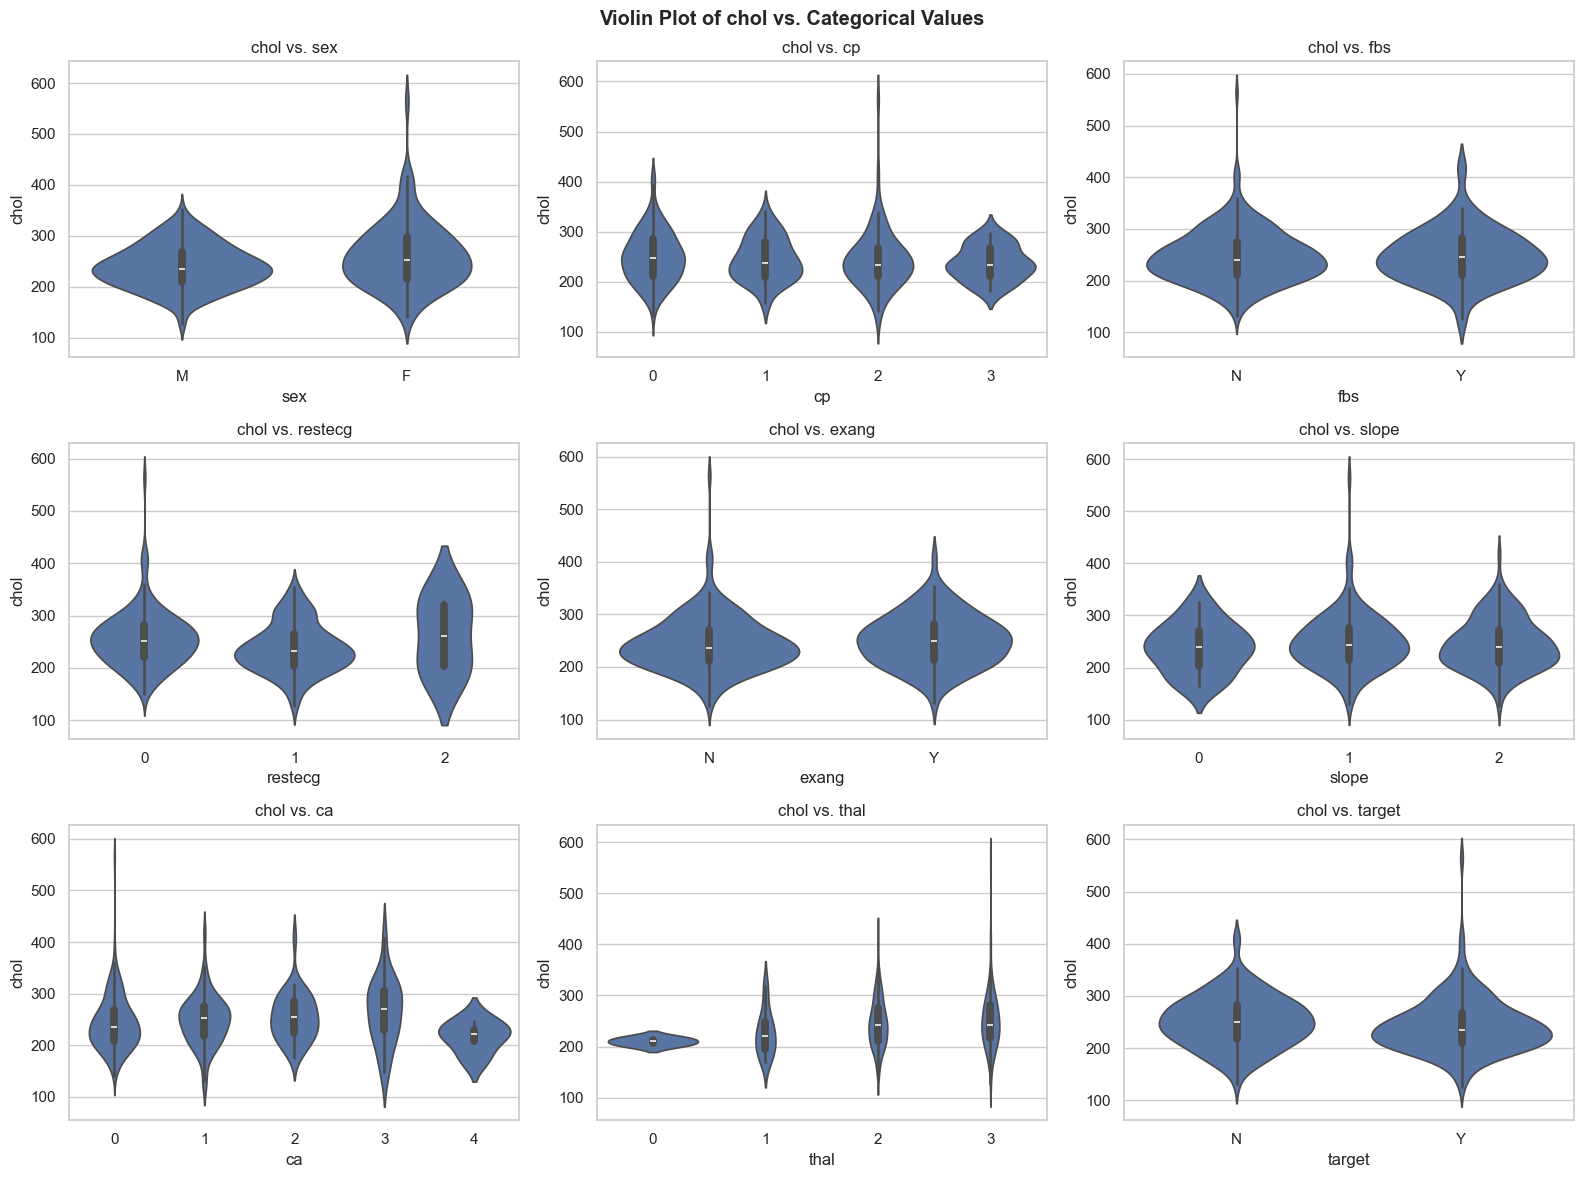

In [108]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,12))

axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.violinplot(x=cat_value, y='chol', data=data, ax=axes[i])
    axes[i].set_title(f"chol vs. {cat_value}")
    
plt.suptitle("Violin Plot of chol vs. Categorical Values", fontweight='semibold')
plt.tight_layout()
plt.show()

In [109]:
# thalach vs. Categorical values

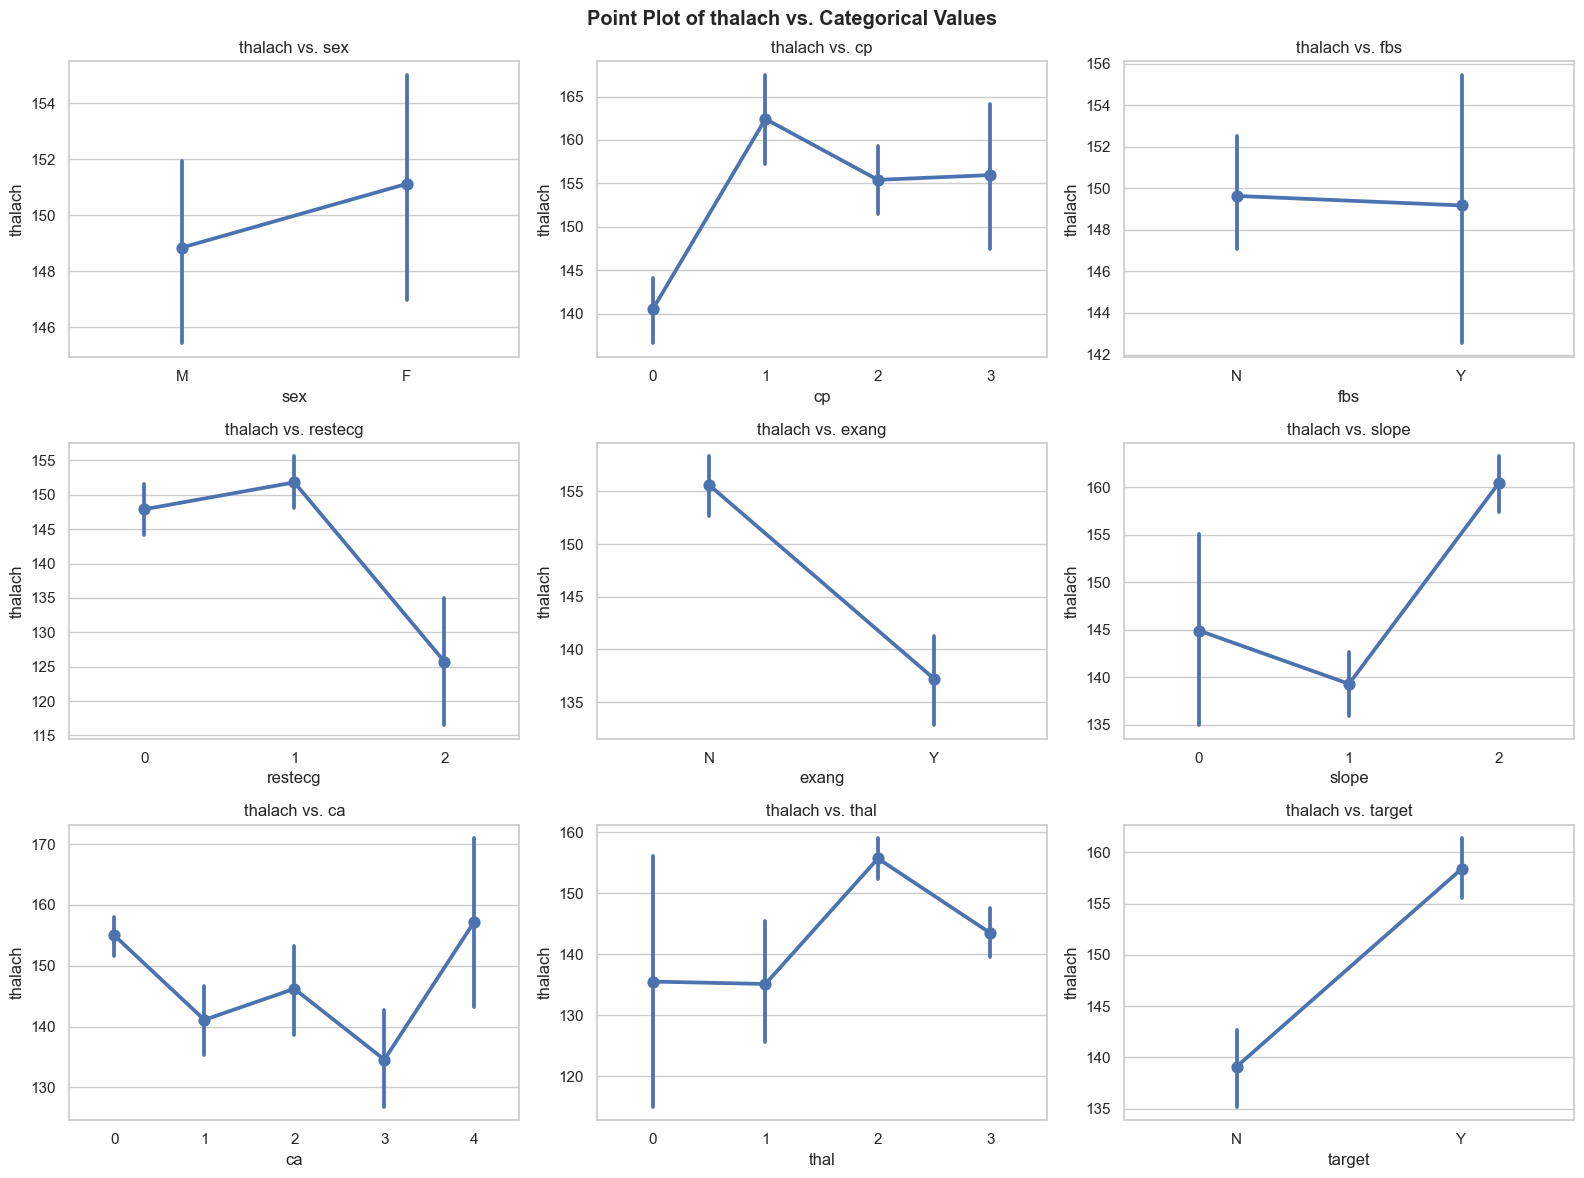

In [111]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,12))

axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.pointplot(x=cat_value, y='thalach', data=data, ax=axes[i])
    axes[i].set_title(f"thalach vs. {cat_value}")
    
plt.suptitle("Point Plot of thalach vs. Categorical Values", fontweight='semibold')
plt.tight_layout()
plt.show()

In [112]:
# oldpeak vs. categorical value

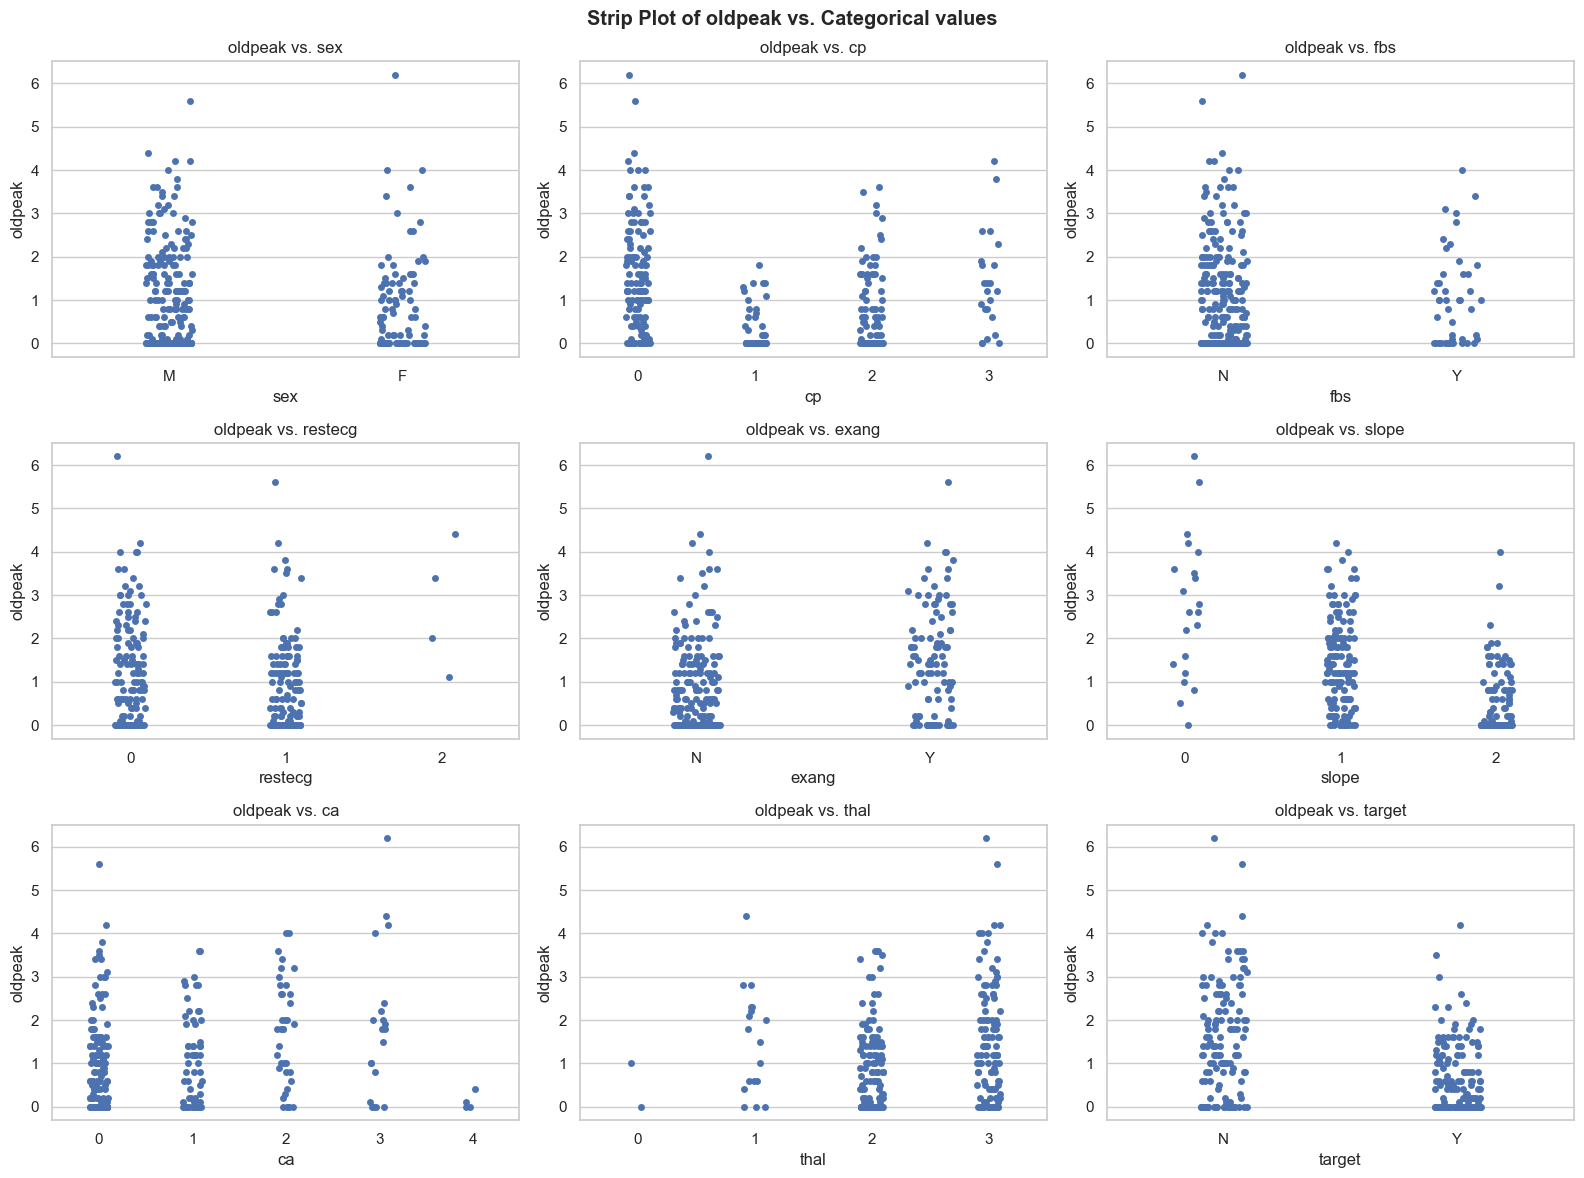

In [113]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,12))
axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.stripplot(x=cat_value, y='oldpeak', data=data, jitter=True, ax=axes[i])
    axes[i].set_title(f"oldpeak vs. {cat_value}")
    
plt.suptitle("Strip Plot of oldpeak vs. Categorical values", fontweight='semibold')
plt.tight_layout()
plt.show()

In [114]:
# target vs. Categorical Values

In [115]:
numerical_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [116]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [117]:
new_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [118]:
new_categorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [119]:
# target vs. Categorical Values

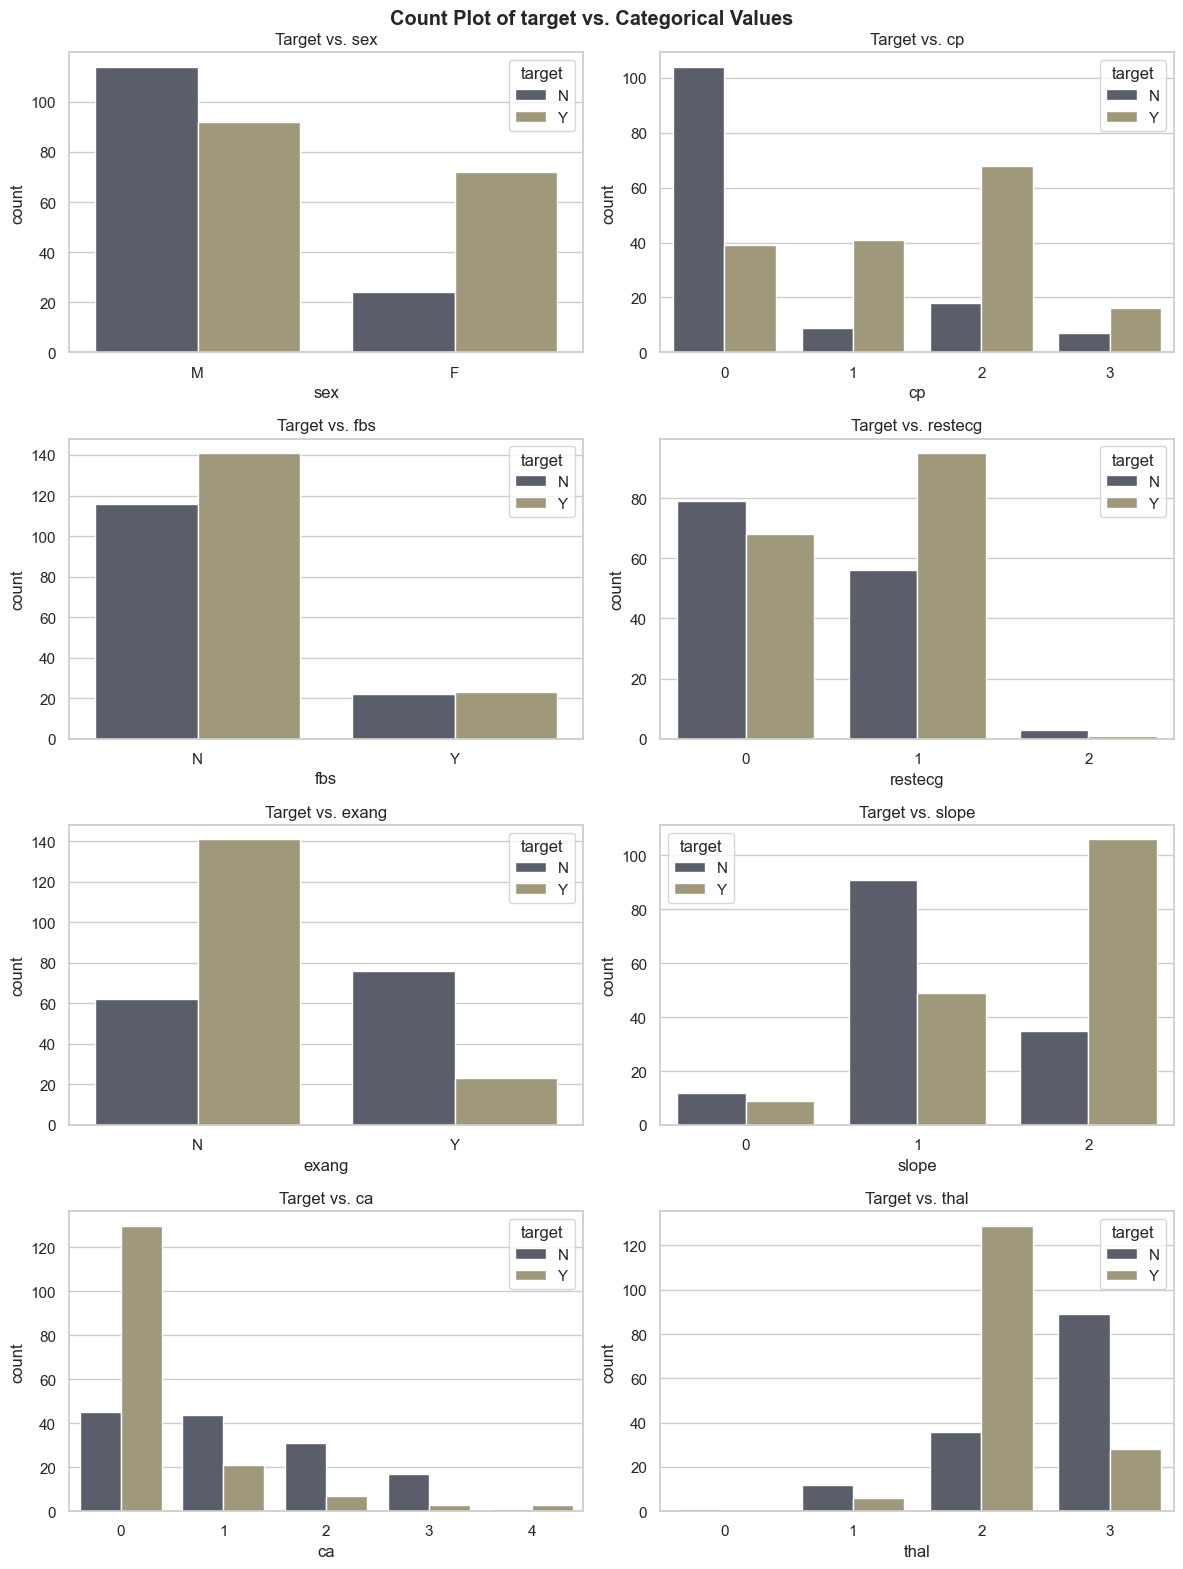

In [121]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16))
axes = axes.flatten()

for i, cat in enumerate(new_categorical):
    sns.countplot(x=cat, hue='target', data=data, ax=axes[i], palette='cividis')
    axes[i].set_title(f"Target vs. {cat}")
    
plt.suptitle("Count Plot of target vs. Categorical Values", fontweight='semibold')
plt.tight_layout()
plt.show()

In [122]:
data = pd.read_csv('heart.csv')

In [123]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [124]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


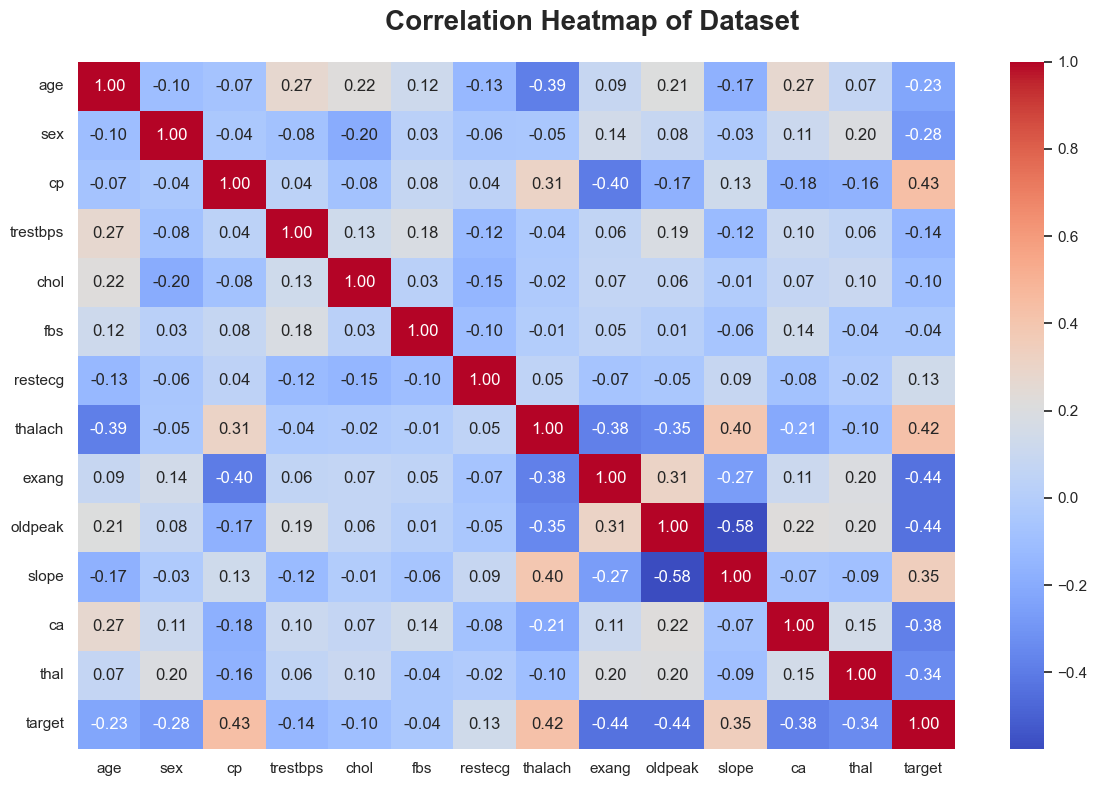

In [125]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle("Correlation Heatmap of Dataset", fontsize=20, fontweight='semibold')
plt.tight_layout()
plt.show()

In [126]:
# Age vs. Cholesterol with Target

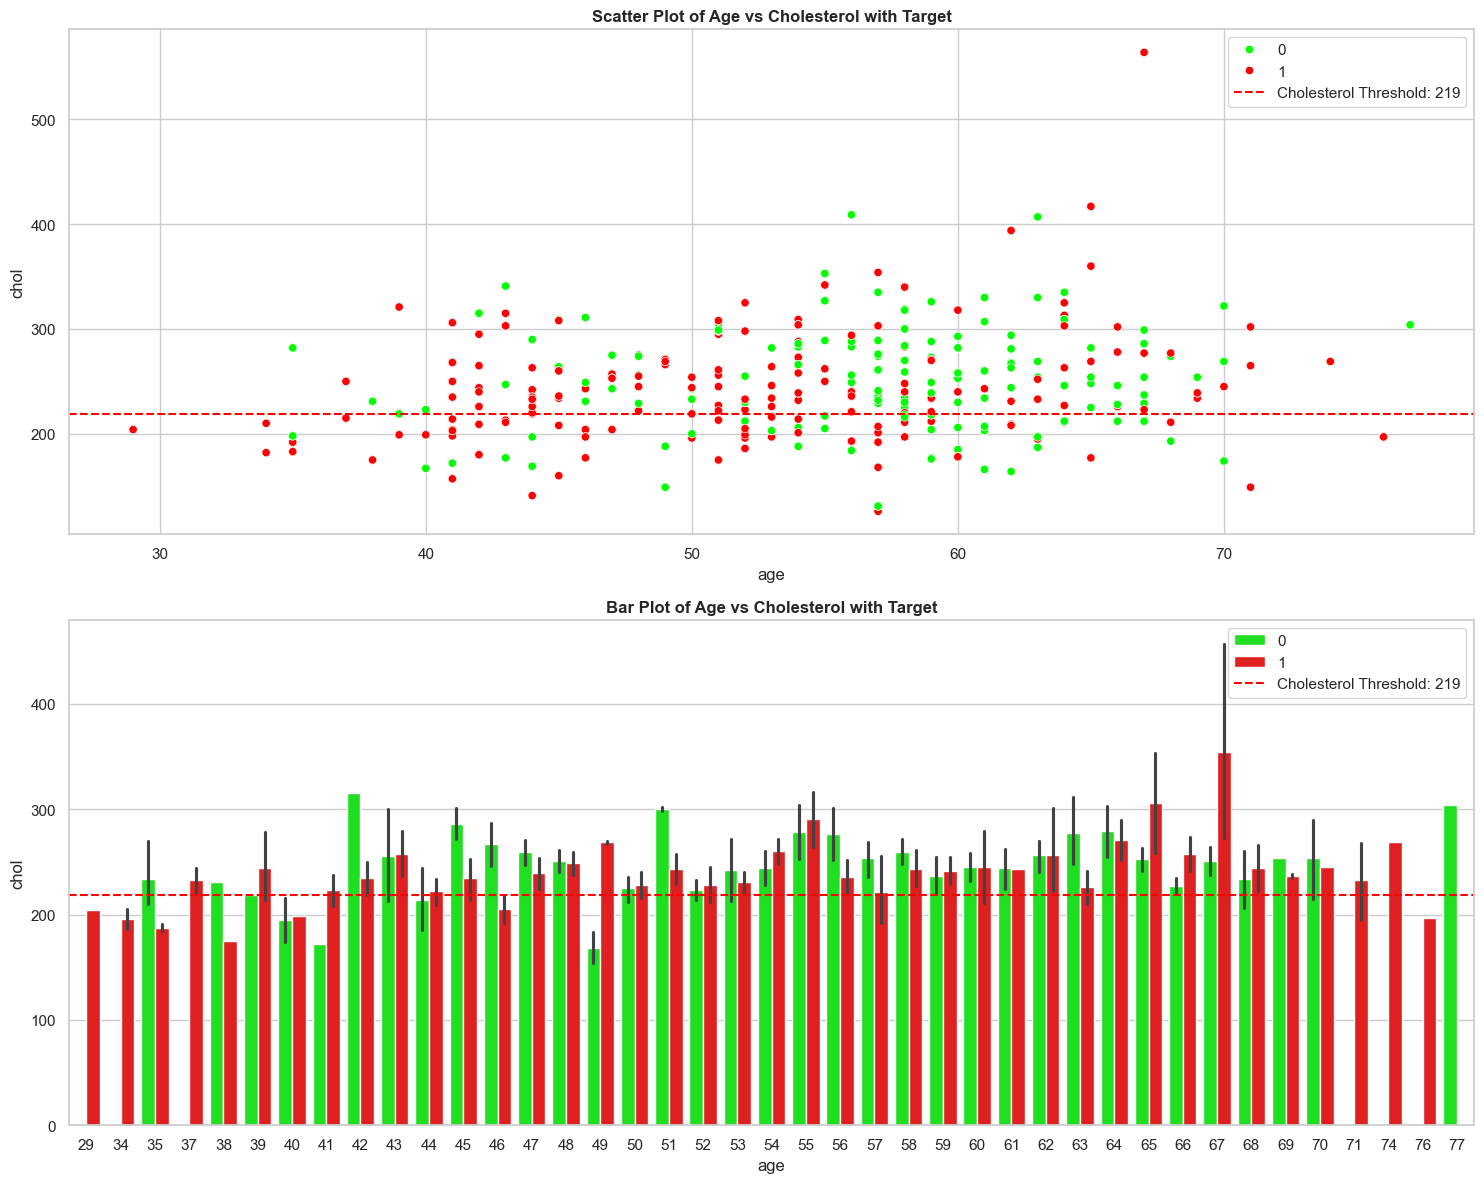

In [129]:
red_shade = "#FF0000"
green_shade = "#00FF00"
sns.set(style='whitegrid')
fig, (ax0,ax1) = plt.subplots(nrows=2, ncols=1, figsize=(15,12))

sns.scatterplot(x='age', y='chol', hue='target', data=data, ax=ax0, palette=[green_shade,red_shade])
ax0.axhline(y=219, linestyle='--', color='red', label='Cholesterol Threshold: 219')
ax0.legend()
ax0.set_title('Scatter Plot of Age vs Cholesterol with Target', fontweight='semibold')

sns.barplot(x='age', y='chol', hue='target', data=data, ax=ax1, palette=[green_shade,red_shade])
ax1.axhline(y=219, linestyle='--', color='red', label='Cholesterol Threshold: 219')
ax1.legend()
ax1.set_title('Bar Plot of Age vs Cholesterol with Target', fontweight='semibold')

plt.tight_layout()
plt.show()